In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

---

In [2]:
def get_first_empty_line(filename: Path) -> int:
    i = 0
    with open(filename) as file:
        while line := file.readline():
            i += 1
            if line == '\n':
                break
    return i

In [3]:
def read_csv_skip_last_lines(filename: Path) -> pd.DataFrame:
    empty_line_number = get_first_empty_line(filename)
    raw_df = pd.read_csv(filename, sep=r'\s+', skiprows=1, header=None, nrows=empty_line_number - 2)
    return raw_df.rename(columns={0 : 'wavelenght', 1 : 'n', 2 : 'k'})

---

carbon dust

In [4]:
carbon_dust = read_csv_skip_last_lines(Path('files/carbon dust - raw data.RI'))
carbon_dust['wavelenght'] = carbon_dust['wavelenght'].to_numpy() * 1e-2
carbon_dust.to_csv('files/carbon_dust.csv', index=None)

ice dust

In [5]:
ice_dust = read_csv_skip_last_lines(Path('files/ice dust - raw data.RI'))
ice_dust['wavelenght'] = ice_dust['wavelenght'].to_numpy() * 1e-6
ice_dust.to_csv('files/ice_dust.csv', index=None)

silicate dust

In [6]:
silicate_dust = read_csv_skip_last_lines(Path('files/silicate dust - raw data.RI'))
silicate_dust['n'] = silicate_dust['n'].to_numpy() + 1
silicate_dust['wavelenght'] = silicate_dust['wavelenght'].to_numpy() * 1e-6
silicate_dust.to_csv('files/silicate_dust.csv', index=None)

---

In [7]:
def plot_nk(filename: Path) -> None:
    silicate_dust = pd.read_csv(filename)
    sns.lineplot(data=silicate_dust, x='wavelenght', y='n', label='n')
    sns.lineplot(data=silicate_dust, x='wavelenght', y='k', label='k')
    plt.legend()
    plt.xscale('log')

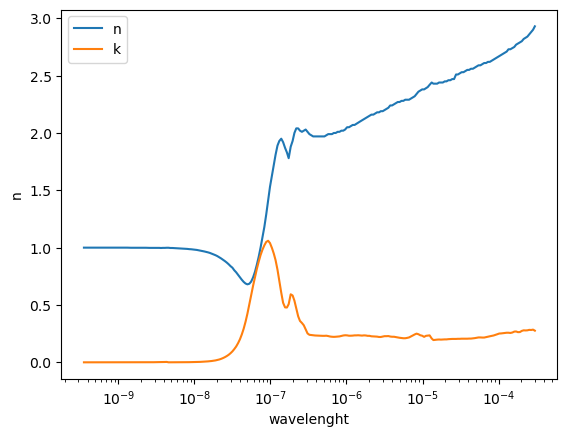

In [8]:
plot_nk('files/carbon_dust.csv')

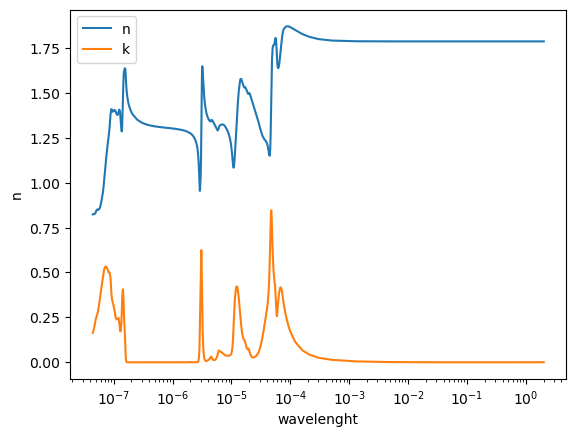

In [9]:
plot_nk('files/ice_dust.csv')

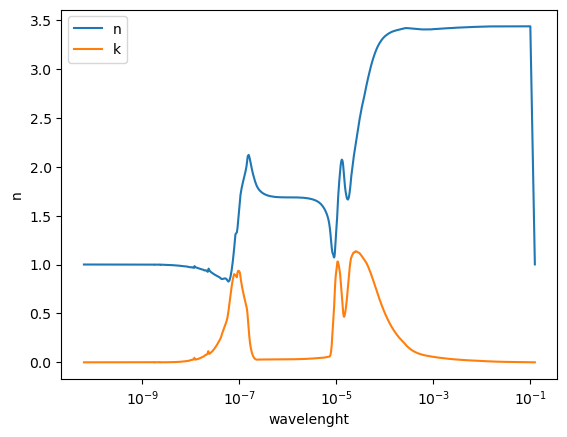

In [10]:
plot_nk('files/silicate_dust.csv')

---

In [11]:
def planck_shorten(wl, t):
    h = 6.62607015 * 10**(-34)
    c = 299_792_458
    k = 1.380649 * 10**(-23)  
    pwr = h * c / (wl * k * t)
    intensity = 1 / ( (wl**5) * (np.exp(pwr) - 1.0) )
    m = np.max(intensity)
    return intensity / m

In [12]:
wl = 10.0 ** np.arange(start=-8, stop=-3, step=0.01)

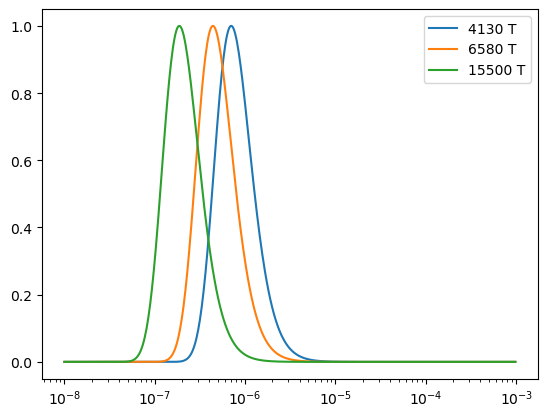

In [13]:
plt.plot(wl, planck_shorten(wl, 4130), label='4130 T')
plt.plot(wl, planck_shorten(wl, 6580), label='6580 T')
plt.plot(wl, planck_shorten(wl, 15500), label='15500 T')
plt.legend()
plt.xscale('log')